In [302]:
import pandas as pd
import string, re
import numpy as np

# Reading and understanding the data

In [303]:
# Read in the data
df = pd.read_csv('../Data/BBC-articles.csv')

In [304]:
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


## You can do this using LSI/LSA and LDA algorithms, after vectorizing the text using TF-IDF vector in three different ways:

- TF-IDF after normal cleaning of the text corpus (punctuation removal, stopword removal, etc.)
- TF-IDF with term frequency filter, to exclude the top 10% of the most frequent words and words that appear less than 5 times in the documents.
- TF-IDF limited to nouns, noun phrases, and named entity recognition only.

In [305]:
## lets use nltk to extract the most significant words from each article to also use TF-IDF and LSI and LDA

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# stopwords from gensim
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### TF-IDF after normal cleaning of the text corpus (punctuation removal, stopword removal, etc.)

In [306]:
def normal_clean(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove whitespace
    text = text.strip()
    # remove stopwords with gensim
    text = [word for word in text.split() if word not in STOPWORDS]
    return text

In [307]:
# clean the text
df['clean_text1'] = df['text'].apply(normal_clean)

df.head(10)

,category,text,clean_text1
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap..."
9,entertainment,last star wars not for children the sixth an...,"[star, wars, children, sixth, final, star, war..."


In [308]:
# TF-IDF after normal cleaning of the text corpus (punctuation removal, stopword removal, etc.)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [309]:
# create a vectorizer object
vectorizer_1 = TfidfVectorizer(stop_words='english', max_features= 2000, max_df = 0.5, smooth_idf=True)

# fit and transform the vectorizer on the text
X = vectorizer_1.fit_transform(df['clean_text1'].apply(lambda x: ' '.join(x)))

In [310]:
# add vectorizer to dataframe
df['tfidf_1'] = [x for x in X.toarray()]
df.head(10)

,category,text,clean_text1,tfidf_1
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,entertainment,last star wars not for children the sixth an...,"[star, wars, children, sixth, final, star, war...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [311]:
# LSI with normal cleaning of the text corpus (punctuation removal, stopword removal, etc.)

from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim

In [312]:
# number of topics, we can get this from the category column
num_topics = len(df['category'].unique())
num_topics

5

In [313]:
# Use LSI on the tfidf_1 column
# create a dictionary from the 'clean_text1' column
dictionary = corpora.Dictionary(df['clean_text1'])
# convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in df['clean_text1']]

# create the tfidf model
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus] # step 2 -- use the model to transform vectors

# create the LSI model
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
# print the topics
lsi.print_topics(5) # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly

[(0,
  '0.172*"mr" + 0.144*"labour" + 0.125*"blair" + 0.120*"election" + 0.117*"brown" + 0.098*"party" + 0.098*"government" + 0.090*"people" + 0.089*"tax" + 0.076*"howard"'),
 (1,
  '-0.269*"labour" + -0.227*"blair" + -0.218*"election" + -0.208*"brown" + -0.187*"mr" + -0.171*"party" + -0.143*"tax" + -0.129*"chancellor" + -0.123*"howard" + 0.118*"film"'),
 (2,
  '0.144*"mobile" + -0.139*"england" + 0.115*"growth" + -0.106*"o" + -0.098*"wales" + -0.096*"best" + -0.095*"win" + 0.093*"broadband" + 0.093*"economy" + -0.092*"ireland"'),
 (3,
  '-0.290*"film" + -0.176*"best" + -0.149*"awards" + 0.136*"england" + -0.121*"award" + 0.119*"economy" + 0.117*"growth" + -0.113*"music" + 0.101*"yukos" + -0.097*"actor"'),
 (4,
  '-0.236*"film" + -0.168*"best" + 0.168*"mobile" + -0.136*"dollar" + -0.126*"economy" + -0.121*"awards" + -0.115*"growth" + -0.113*"yukos" + 0.110*"phone" + -0.105*"oil"')]

In [314]:
# Add the LSI topics to the dataframe
df['lsi_1'] = [x for x in corpus_lsi]
df.head(10)

,category,text,clean_text1,tfidf_1,lsi_1
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.07129809818056697), (1, 0.0629516051889..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09565514706372243), (1, 0.1055996471651..."
9,entertainment,last star wars not for children the sixth an...,"[star, wars, children, sixth, final, star, war...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.06147434972666529), (1, 0.0453537966915..."


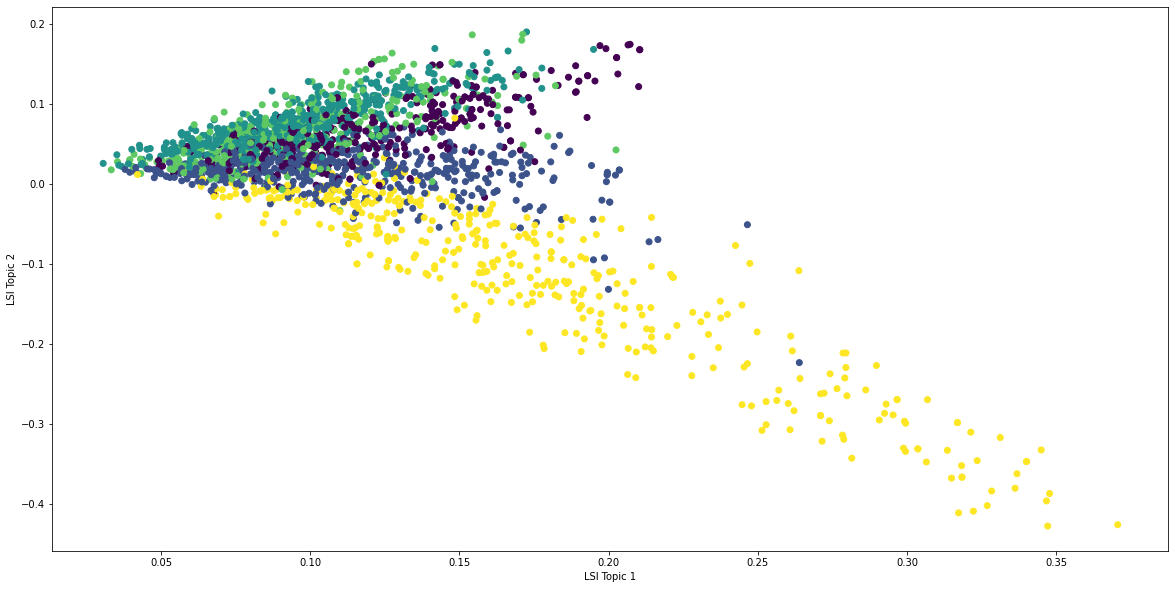

In [315]:
# Lets plot the LSI topics
import matplotlib.pyplot as plt

# plot the LSI topics
plt.figure(figsize=(20, 10))
plt.scatter(df['lsi_1'].apply(lambda x: x[0][1]), df['lsi_1'].apply(lambda x: x[1][1]), c=df['category'].factorize()[0])
plt.xlabel('LSI Topic 1')
plt.ylabel('LSI Topic 2')
plt.show()

In [316]:
# Create coherence model for LSI
coherence_model_lsi = CoherenceModel(model=lsi, texts=df['clean_text1'], dictionary=dictionary, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence() # get coherence value

Coherence Score:  0.6475920093720019
Number of Topics:  2
---------------------
Coherence Score:  0.5488126674194354
Number of Topics:  3
---------------------
Coherence Score:  0.48307402752456413
Number of Topics:  4
---------------------
Coherence Score:  0.5119370382341518
Number of Topics:  5
---------------------
Coherence Score:  0.5286613738364531
Number of Topics:  6
---------------------
Coherence Score:  0.37235424428298297
Number of Topics:  7
---------------------


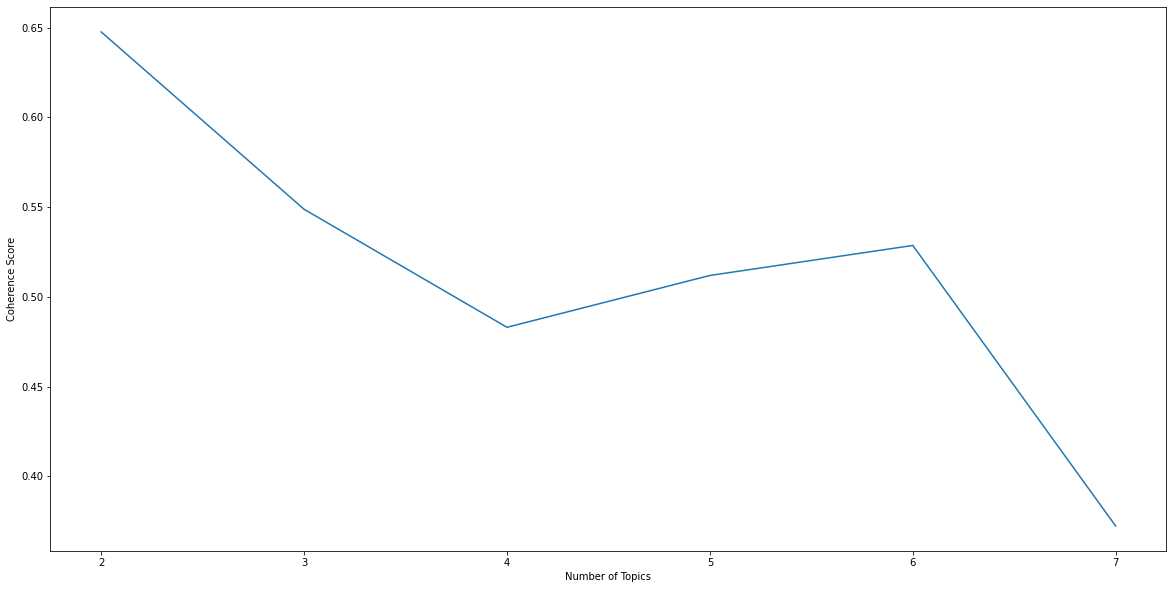

In [317]:
# plot the coherence scores
coherence_scores = []
for i in range(2, 8):
    lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=i)
    coherence_model_lsi = CoherenceModel(model=lsi, texts=df['clean_text1'], dictionary=dictionary, coherence='c_v')
    coherence_lsi = coherence_model_lsi.get_coherence()
    coherence_scores.append(coherence_lsi)
    print('Coherence Score: ', coherence_lsi) # get coherence value
    print('Number of Topics: ', i) # get coherence value
    print('---------------------') # get coherence value

plt.figure(figsize=(20, 10))
plt.plot(range(2, 8), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show() # get coherence value

In [318]:
# Lets use LDA with normal cleaning of the text corpus (punctuation removal, stopword removal, etc.)

# create the LDA model
lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=5) # initialize an LDA transformation
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lda

# print the topics
lda.print_topics(5) # both bow->tfidf and tfidf->lda transformations are actually executed here, on the fly

# Add the LDA topics to the dataframe
df['lda_1'] = [x for x in corpus_lda]
df.head(10)

,category,text,clean_text1,tfidf_1,lsi_1,lda_1
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275...","[(0, 0.022733783), (1, 0.12994428), (2, 0.0230..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.07129809818056697), (1, 0.0629516051889...","[(0, 0.67699426), (1, 0.0270398), (2, 0.027140..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09565514706372243), (1, 0.1055996471651...","[(0, 0.025235916), (1, 0.024903042), (2, 0.024..."
9,entertainment,last star wars not for children the sixth an...,"[star, wars, children, sixth, final, star, war...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.06147434972666529), (1, 0.0453537966915...","[(0, 0.025258647), (1, 0.025403513), (2, 0.025..."


In [319]:
# Let's create a coherence model for LDA
coherence_model_lda = CoherenceModel(model=lda, texts=df['clean_text1'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() # get coherence value
print('Coherence Score: ', coherence_lda) # get coherence value
print('Number of Topics: ', 5) # get coherence value
print('---------------------') # get coherence value

Coherence Score:  0.4883107866235634
Number of Topics:  5
---------------------


Coherence Score:  0.31787795384802875
Number of Topics:  2
---------------------
Coherence Score:  0.37256127924430443
Number of Topics:  3
---------------------
Coherence Score:  0.40427559776475175
Number of Topics:  4
---------------------
Coherence Score:  0.45413843507967355
Number of Topics:  5
---------------------
Coherence Score:  0.47798699382475746
Number of Topics:  6
---------------------
Coherence Score:  0.47768217372252125
Number of Topics:  7
---------------------


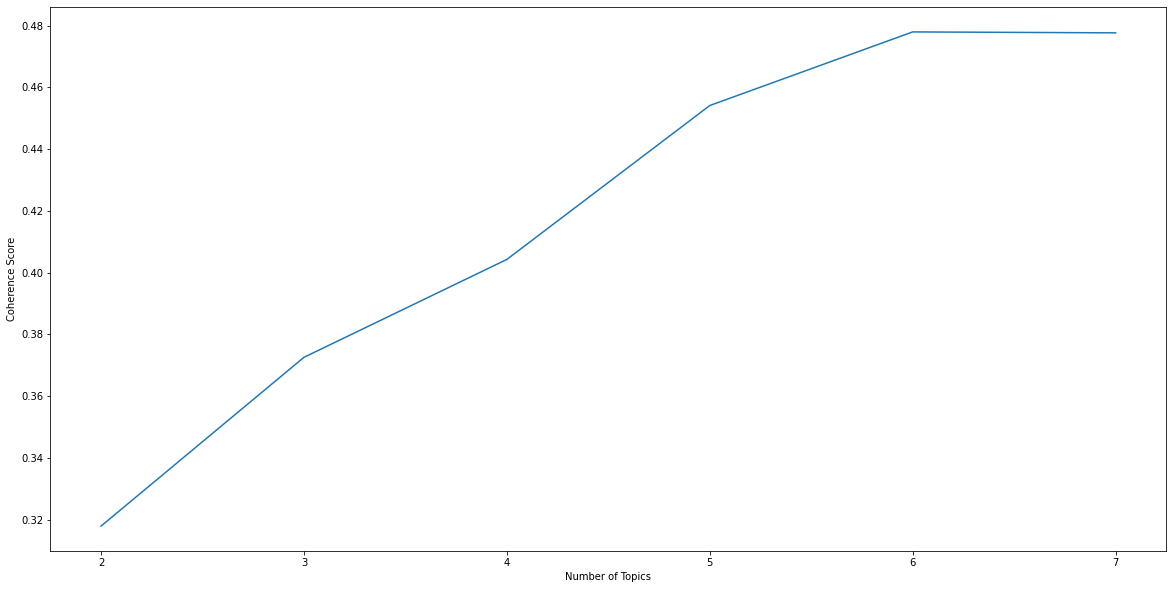

In [320]:
# plot the coherence scores
coherence_scores = []
for i in range(2, 8):
    lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda, texts=df['clean_text1'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    print('Coherence Score: ', coherence_lda) # get coherence value
    print('Number of Topics: ', i) # get coherence value
    print('---------------------') # get coherence value


plt.figure(figsize=(20, 10))
plt.plot(range(2, 8), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show() # get coherence value

### TF-IDF with term frequency filter, to exclude the top 10% of the most frequent words and words that appear less than 5 times in the documents.

In [321]:
# TF-IDF with term frequency filtering, we will exluding the top 10% of terms with the highest term frequency for the entire corpus

word_frequencies = dict()

for text in df['text']:
    for word in text.split():
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1


sorted(list(word_frequencies.items()), key=lambda x: x[1], reverse=True)[:10]

[('the', 52567),
 ('to', 24955),
 ('of', 19947),
 ('and', 18561),
 ('a', 18251),
 ('in', 17570),
 ('s', 9007),
 ('for', 8884),
 ('is', 8515),
 ('that', 8135)]

In [322]:
top_10_percent = int(len(word_frequencies) * 0.1)

In [323]:
# remove the top_10_percent words from the word_frequencies dictionary
for word in sorted(word_frequencies, key=word_frequencies.get, reverse=True)[:top_10_percent]:
    del word_frequencies[word]

sorted(list(word_frequencies.items()), key=lambda x: x[1], reverse=True)[:10]

[('profits.', 19),
 ('recovered', 19),
 ('strategist', 19),
 ('consortium', 19),
 ('avoided', 19),
 ('motor', 19),
 ('bank.', 19),
 ('hopeful', 19),
 ('christmas.', 19),
 ('attachment', 19)]

In [324]:
len(word_frequencies)

39394

In [325]:
# remove any item in word_frequencies that appears less than 5 times
for word in list(word_frequencies):
    if word_frequencies[word] < 5:
        del word_frequencies[word]

len(word_frequencies)

8022

In [326]:
# lets tokenize the text and only add words that are in the word_frequencies dictionary

def tokenize_text(text):
    tokens = text.split()
    tokens = [token for token in tokens if token in word_frequencies]

    return tokens


In [327]:
# create new clean_text2 column using the tokenize_text function
df['clean_text2'] = df['text'].apply(lambda x: tokenize_text(x))

In [328]:
df.head(10)

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275...","[(0, 0.022733783), (1, 0.12994428), (2, 0.0230...","[prepares, marr, resisted, recently., frantic,..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.07129809818056697), (1, 0.0629516051889...","[(0, 0.67699426), (1, 0.0270398), (2, 0.027140...","[quarter-final, ivan, croatian, halted, rain, ..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09565514706372243), (1, 0.1055996471651...","[(0, 0.025235916), (1, 0.024903042), (2, 0.024...","[long-awaited, 25-year-old, murrayfield, bench..."
9,entertainment,last star wars not for children the sixth an...,"[star, wars, children, sixth, final, star, war...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.06147434972666529), (1, 0.0453537966915...","[(0, 0.025258647), (1, 0.025403513), (2, 0.025...","[suitable, film-maker, lucas, revenge, violent..."


In [329]:
# create a vectorizer object
vectorizer_2 = TfidfVectorizer(stop_words='english', max_features= 2000, max_df = 0.5, smooth_idf=True)

# fit and transform the vectorizer on the text
X = vectorizer_2.fit_transform(df['clean_text2'].apply(lambda x: ' '.join(x)))

# add vectorizer to dataframe
df['tfidf_2'] = [x for x in X.toarray()]

In [330]:
df.head(10)

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2,tfidf_2
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2767406767597..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275...","[(0, 0.022733783), (1, 0.12994428), (2, 0.0230...","[prepares, marr, resisted, recently., frantic,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.07129809818056697), (1, 0.0629516051889...","[(0, 0.67699426), (1, 0.0270398), (2, 0.027140...","[quarter-final, ivan, croatian, halted, rain, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09565514706372243), (1, 0.1055996471651...","[(0, 0.025235916), (1, 0.024903042), (2, 0.024...","[long-awaited, 25-year-old, murrayfield, bench...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,entertainment,last star wars not for children the sixth an...,"[star, wars, children, sixth, final, star, war...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.06147434972666529), (1, 0.0453537966915...","[(0, 0.025258647), (1, 0.025403513), (2, 0.025...","[suitable, film-maker, lucas, revenge, violent...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [331]:
# Add the LSI topics to the dataframe
df['lsi_2'] = [x for x in corpus_lsi_2]
df.head(10) # get coherence value

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2,tfidf_2,lsi_2
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.2543618483189095), (1, -0.030780742721..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2767406767597...","[(0, -0.056683244630928165), (1, -0.0214153629..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.025722335490471596), (1, -0.0039278616..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1495351121519697), (1, -0.050517657173..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.14459686392078036), (1, -0.04196720557..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1922281538377411), (1, -0.034602390774..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275...","[(0, 0.022733783), (1, 0.12994428), (2, 0.0230...","[prepares, marr, resisted, recently., frantic,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.058910585496808186), (1, -0.0015461049..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.07129809818056697), (1, 0.0629516051889...","[(0, 0.67699426), (1, 0.0270398), (2, 0.027140...","[quarter-final, ivan, croatian, halted, rain, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.07933751671092212), (1, -0.05636244213..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09565514706372243), (1, 0.1055996471651...","[(0, 0.025235916), (1, 0.024903042), (2, 0.024...","[long-awaited, 25-year-old, murrayfield, bench...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.028476659182226745), (1, -0.0110865166..."
9,entertainment,last star wars not for children the sixth an...,"[star, wars, children, sixth, final, star, war...","

In [332]:
# Use LSI on tfidf_2 column
# create new dictionary and corpus
dictionary = corpora.Dictionary(df['clean_text2']) # create a dictionary from the text
corpus_tfidf_2 = [dictionary.doc2bow(text) for text in df['clean_text2']] # convert the dictionary to a bag of words corpus

# create the LSI model
lsi_2 = models.LsiModel(corpus_tfidf_2, id2word=dictionary, num_topics=5) # initialize an LSI transformation
corpus_lsi_2 = lsi_2[corpus_tfidf_2] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

# print the topics
lsi_2.print_topics(5) # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly

[(0,
  '0.322*"frederick" + 0.228*"ira" + 0.204*"mr." + 0.193*"ira." + 0.169*"kill" + 0.164*"liberties" + 0.161*"tyranny" + 0.161*"tyranny." + 0.161*"forsyth." + 0.130*"internment"'),
 (1,
  '-0.536*"foxx;" + -0.421*"swank." + -0.345*"aviator;" + -0.268*"scorsese;" + -0.230*"gant" + -0.230*"eastwood;" + -0.201*"dams" + -0.194*"staunton." + -0.191*"sideways;" + -0.089*"winslet"'),
 (2,
  '-0.249*"roundabout" + -0.206*"thunderbirds" + -0.151*"nostalgia" + -0.145*"remake" + -0.116*"song." + 0.116*"frederick" + -0.110*"everquest" + -0.110*"memories" + -0.098*"classics" + -0.091*"transformers"'),
 (3,
  '-0.203*"roundabout" + -0.168*"thunderbirds" + 0.160*"(biarritz)" + 0.150*"orquera" + 0.150*"toulousain)" + 0.147*"bergamasco" + 0.127*"marigny" + 0.125*"harinordoquy" + 0.118*"shanklin" + -0.117*"nostalgia"'),
 (4,
  '0.289*"(biarritz)" + 0.271*"toulousain)" + 0.223*"harinordoquy" + 0.176*"yannick" + 0.155*"(bourgoin)" + 0.153*"julien" + 0.138*"rougerie" + 0.129*"imanol" + 0.128*"valbon" + 

In [333]:
# Let's create an LSI coherence model for tfidf_2 column
coherence_model_lsi_2 = CoherenceModel(model=lsi_2, texts=df['clean_text2'], dictionary=dictionary, coherence='c_v') # get coherence value
coherence_lsi_2 = coherence_model_lsi_2.get_coherence() # get coherence value
print('Coherence Score: ', coherence_lsi_2) # get coherence value
print('Number of Topics: ', 5) # get coherence value
print('---------------------') # get coherence value

Coherence Score:  0.7143827996128966
Number of Topics:  5
---------------------


Coherence Score:  0.7817182728157437
Number of Topics:  2
---------------------
Coherence Score:  0.7797038028429722
Number of Topics:  3
---------------------
Coherence Score:  0.6618709659498214
Number of Topics:  4
---------------------
Coherence Score:  0.5959430894716902
Number of Topics:  5
---------------------
Coherence Score:  0.6903640473187749
Number of Topics:  6
---------------------
Coherence Score:  0.6788023615638578
Number of Topics:  7
---------------------


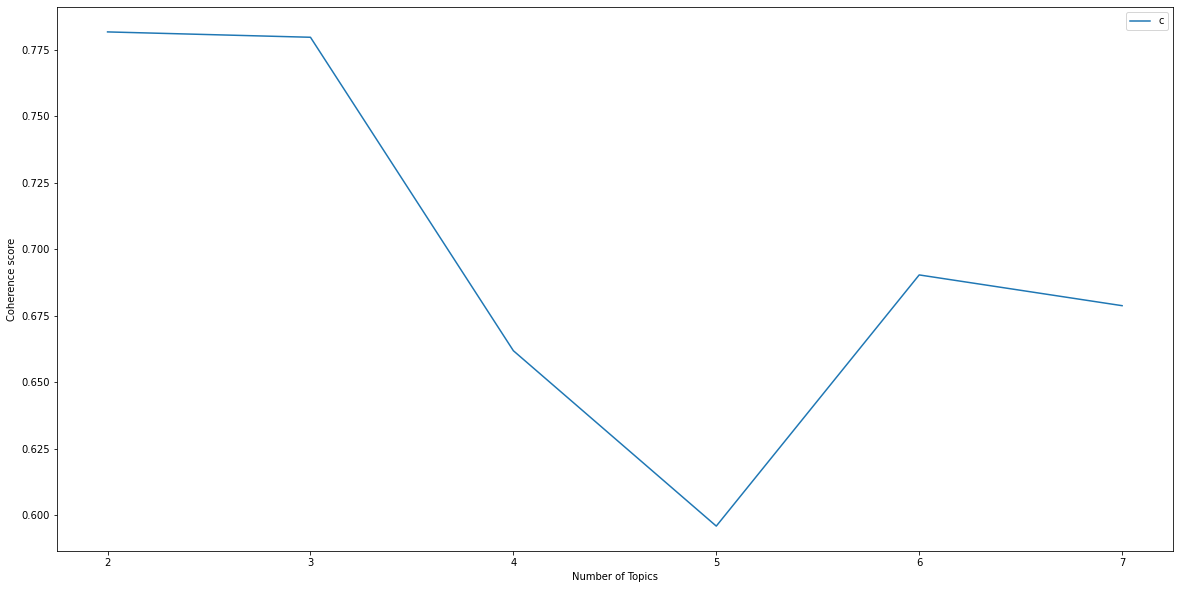

In [334]:
# plot the coherence scores
coherence_scores = [] # get coherence value
for i in range(2, 8): # get coherence value
    lsi_2 = models.LsiModel(corpus_tfidf_2, id2word=dictionary, num_topics=i) # get coherence value
    coherence_model_lsi_2 = CoherenceModel(model=lsi_2, texts=df['clean_text2'], dictionary=dictionary, coherence='c_v') # get coherence value
    coherence_lsi_2 = coherence_model_lsi_2.get_coherence() # get coherence value
    coherence_scores.append(coherence_lsi_2) # get coherence value
    print('Coherence Score: ', coherence_lsi_2) # get coherence value
    print('Number of Topics: ', i) # get coherence value
    print('---------------------') # get coherence value


# plot the coherence scores
plt.figure(figsize=(20, 10)) # get coherence value
plt.plot(range(2, 8), coherence_scores) # get coherence value
plt.xlabel("Number of Topics") # get coherence value
plt.ylabel("Coherence score") # get coherence value
plt.legend(("coherence_values"), loc='best') # get coherence value
plt.show() # get coherence value

In [335]:
# create the LDA model
lda = models.LdaModel(corpus_tfidf_2, id2word=dictionary, num_topics=5) # initialize an LDA transformation
corpus_lda_2 = lda[corpus_tfidf_2] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lda

# print the topics
lda.print_topics(5) # both bow->tfidf and tfidf->lda transformations are actually executed here, on the fly

[(0,
  '0.004*"confess" + 0.003*"lesotho" + 0.003*"ferrari" + 0.003*"austria" + 0.003*"maserati" + 0.003*"wang" + 0.002*"mms" + 0.002*"(france)" + 0.002*"tapes" + 0.002*"prints"'),
 (1,
  '0.004*"asimo" + 0.003*"irish." + 0.003*"korn" + 0.002*"ppi" + 0.002*"boogeyman" + 0.002*"toure" + 0.002*"rio" + 0.002*"0.3%" + 0.002*"crosby" + 0.002*"kapranos"'),
 (2,
  '0.004*"morrison" + 0.004*"domains" + 0.003*"quotas" + 0.003*"jowell" + 0.003*"refugees" + 0.003*"hendrix" + 0.003*"postal" + 0.003*"summary" + 0.002*"dean." + 0.002*"icann"'),
 (3,
  '0.005*"stern" + 0.003*"hsdpa" + 0.003*"cantona" + 0.003*"mock" + 0.003*"hockney" + 0.003*"bot" + 0.002*"slide" + 0.002*"beer" + 0.002*"panke" + 0.002*"hayes"'),
 (4,
  '0.004*"cabir" + 0.004*"blinkx" + 0.003*"argonaut" + 0.003*"halifax" + 0.003*"archer" + 0.003*"marion" + 0.003*"desailly" + 0.003*"canadian" + 0.003*"dome" + 0.002*"usability"')]

In [336]:
# Add the LDA topics to the dataframe
df['lda_2'] = [x for x in corpus_lda_2]
df.head(10)

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2,tfidf_2,lsi_2,lda_2
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.2543618483189095), (1, -0.030780742721...","[(1, 0.41074812), (2, 0.42925924), (4, 0.15145..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2767406767597...","[(0, -0.056683244630928165), (1, -0.0214153629...","[(1, 0.29187563), (2, 0.40473023), (3, 0.29167..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.025722335490471596), (1, -0.0039278616...","[(0, 0.30218706), (1, 0.069430515), (2, 0.0147..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1495351121519697), (1, -0.050517657173...","[(1, 0.14359447), (2, 0.23170993), (4, 0.61618..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.14459686392078036), (1, -0.04196720557...","[(1, 0.725421), (2, 0.19846648), (3, 0.063881)]"
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1922281538377411), (1, -0.034602390774...","[(1, 0.89870477), (2, 0.087623805)]"
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275...","[(0, 0.022733783), (1, 0.12994428), (2, 0.0230...","[prepares, marr, resisted, recently., frantic,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.058910585496808186), (1, -0.0015461049...","[(0, 0.015193037), (1, 0.7259289), (2, 0.01455..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.07129809818056697), (1, 0.0629516051889...","[(0, 0.67699426), (1, 0.0270398), (2, 0.027140...","[quarter-final, ivan, croatian, halted, rain, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.07933751671092212), (1, -0.05636244213...","[(0, 0.011460043), (1, 0.011554476), (2, 0.011..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap...","[0.0, 0.0, 0.0, 0.0, 0

In [337]:
# Let's create a coherence model for lda_2 column
coherence_model_lda_2 = CoherenceModel(model=lda, texts=df['clean_text2'], dictionary=dictionary, coherence='c_v') # get coherence value
coherence_lda_2 = coherence_model_lda_2.get_coherence() # get coherence value
print('Coherence Score: ', coherence_lda_2) # get coherence value
print('Number of Topics: ', 5) # get coherence value
print('---------------------') # get coherence value

Coherence Score:  0.7196136814350835
Number of Topics:  5
---------------------


Coherence Score:  0.7712133255055484
Number of Topics:  2
---------------------
Coherence Score:  0.7294330564081767
Number of Topics:  3
---------------------
Coherence Score:  0.7130228892455387
Number of Topics:  4
---------------------
Coherence Score:  0.7349624576905539
Number of Topics:  5
---------------------
Coherence Score:  0.6938476138540098
Number of Topics:  6
---------------------
Coherence Score:  0.7022327613208141
Number of Topics:  7
---------------------


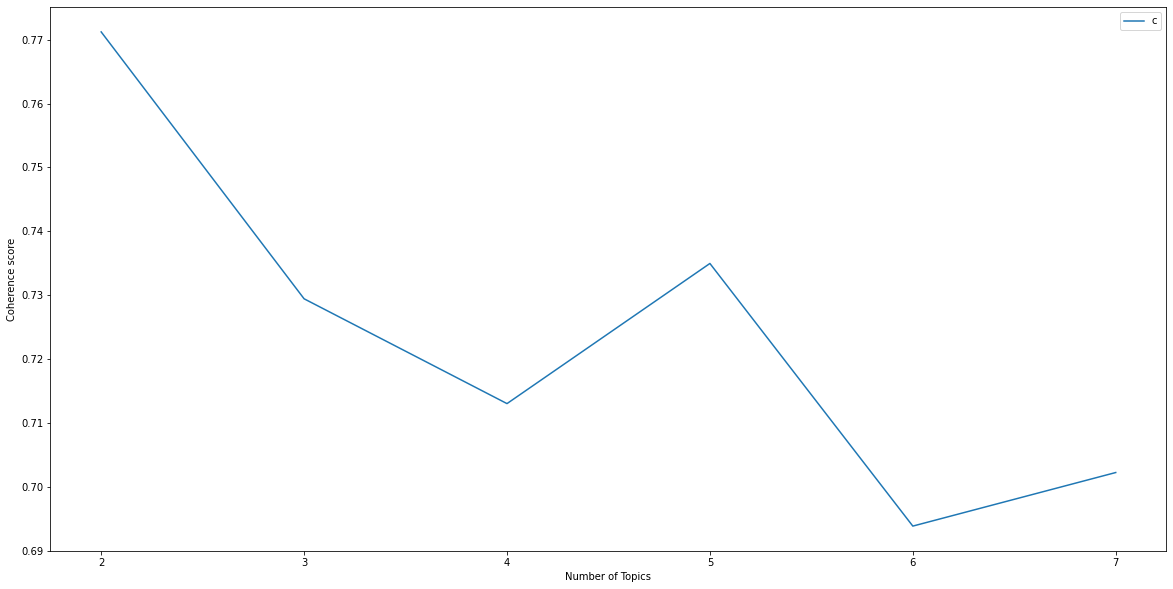

In [338]:
# plot the coherence scores
coherence_scores = [] # get coherence value
for i in range(2, 8): # get coherence value
    lda = models.LdaModel(corpus_tfidf_2, id2word=dictionary, num_topics=i) # get coherence value
    coherence_model_lda_2 = CoherenceModel(model=lda, texts=df['clean_text2'], dictionary=dictionary, coherence='c_v') # get coherence value
    coherence_lda_2 = coherence_model_lda_2.get_coherence() # get coherence value
    coherence_scores.append(coherence_lda_2) # get coherence value
    print('Coherence Score: ', coherence_lda_2) # get coherence value
    print('Number of Topics: ', i) # get coherence value
    print('---------------------') # get coherence value

# plot the coherence scores
plt.figure(figsize=(20, 10)) # get coherence value
plt.plot(range(2, 8), coherence_scores) # get coherence value
plt.xlabel("Number of Topics") # get coherence value
plt.ylabel("Coherence score") # get coherence value
plt.legend(("coherence_values"), loc='best') # get coherence value
plt.show() # get coherence value

### TF-IDF limited to nouns, noun phrases, and named entity recognition only.

In [339]:
# lets use spacy to lemmatize the text, only allow nouns, noun phrases and entity recognition
import spacy
nlp = spacy.load('en_core_web_md')

def lemmatize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'NOUN']]
    return tokens

In [340]:
# create new clean_text3 column using the lemmatize_text function
df['clean_text3'] = df['text'].apply(lambda x: lemmatize_text(x))

df.head(10)

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2,tfidf_2,lsi_2,lda_2,clean_text3
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.2543618483189095), (1, -0.030780742721...","[(1, 0.41074812), (2, 0.42925924), (4, 0.15145...","[tv, future, hands, viewers, home, theatre, sy..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2767406767597...","[(0, -0.056683244630928165), (1, -0.0214153629...","[(1, 0.29187563), (2, 0.40473023), (3, 0.29167...","[worldcom, boss, books, worldcom, boss, bernie..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.025722335490471596), (1, -0.0039278616...","[(0, 0.30218706), (1, 0.069430515), (2, 0.0147...","[tigers, farrell, gamble, leicester, bid, andy..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1495351121519697), (1, -0.050517657173...","[(1, 0.14359447), (2, 0.23170993), (4, 0.61618...","[newcastle, fa, cup, premiership, side, newcas..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.14459686392078036), (1, -0.04196720557...","[(1, 0.725421), (2, 0.19846648), (3, 0.063881)]","[ocean, raids, box, office, ocean, crime, cape..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1922281538377411), (1, -0.034602390774...","[(1, 0.89870477), (2, 0.087623805)]","[mongrel, jibe, michael, howard, claim, peter,..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275...","[(0, 0.022733783), (1, 0.12994428), (2, 0.0230...","[prepares, marr, resisted, recently., frantic,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.058910585496808186), (1, -0.0015461049...","[(0, 0.015193037), (1, 0.7259289), (2, 0.01455...","[blair, poll, date, tony, blair, election, day..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hopes, ended, dubai, seed, tim, henma...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.07129809818056697), (1, 0.0629516051889...","[(0, 0.67699426)

In [341]:
# create a vectorizer object
vectorizer_3 = TfidfVectorizer(stop_words='english', max_features= 2000, max_df = 0.5, smooth_idf=True)

# fit and transform the vectorizer on the text
X = vectorizer_3.fit_transform(df['clean_text3'].apply(lambda x: ' '.join([token for token in x])))

# add vectorizer to dataframe
df['tfidf_3'] = [x for x in X.toarray()]

df.head(10)

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2,tfidf_2,lsi_2,lda_2,clean_text3,tfidf_3
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.2543618483189095), (1, -0.030780742721...","[(1, 0.41074812), (2, 0.42925924), (4, 0.15145...","[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2767406767597...","[(0, -0.056683244630928165), (1, -0.0214153629...","[(1, 0.29187563), (2, 0.40473023), (3, 0.29167...","[worldcom, boss, books, worldcom, boss, bernie...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.025722335490471596), (1, -0.0039278616...","[(0, 0.30218706), (1, 0.069430515), (2, 0.0147...","[tigers, farrell, gamble, leicester, bid, andy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1495351121519697), (1, -0.050517657173...","[(1, 0.14359447), (2, 0.23170993), (4, 0.61618...","[newcastle, fa, cup, premiership, side, newcas...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.14459686392078036), (1, -0.04196720557...","[(1, 0.725421), (2, 0.19846648), (3, 0.063881)]","[ocean, raids, box, office, ocean, crime, cape...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1922281538377411), (1, -0.034602390774...","[(1, 0.89870477), (2, 0.087623805)]","[mongrel, jibe, michael, howard, claim, peter,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.2141683424652716), (1, -0.2048749511275...","[(0, 0.022733783), (1, 0.12994428), (2, 0.0230...","[prepares, marr, resisted, recently., frantic,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.058910585496808186), (1, -0.0015461049...","[(0, 0.0151930

In [342]:
# create new corpus_tfidf_3 column using the tfidf_3 column
dictionary = corpora.Dictionary(df['clean_text3']) # create the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(df['tfidf_3']) # convert tokenized documents into a document-term matrix
corpus_tfidf_3 = [dictionary.doc2bow(text) for text in df['clean_text3']] # convert tokenized documents into a document-term matrix

# create the LSI model
lsi_3 = models.LsiModel(corpus_tfidf_3, id2word=dictionary, num_topics=5) # initialize an LSI transformation
corpus_lsi_3 = lsi_3[corpus_tfidf_3] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

# print the topics
lsi_3.print_topics(5) # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly

[(0,
  '0.491*"mr" + 0.301*"people" + 0.197*"year" + 0.197*"%" + 0.179*"government" + 0.153*"t" + 0.140*"labour" + 0.136*"music" + 0.132*"time" + 0.123*"years"'),
 (1,
  '0.503*"mr" + -0.320*"music" + 0.220*"labour" + 0.186*"blair" + -0.186*"year" + -0.181*"%" + 0.165*"party" + 0.159*"election" + -0.141*"people" + 0.138*"brown"'),
 (2,
  '-0.521*"%" + 0.441*"music" + 0.246*"song" + 0.240*"t" + -0.191*"year" + -0.127*"growth" + 0.121*"angels" + 0.118*"people" + 0.116*"years" + -0.113*"us"'),
 (3,
  '-0.368*"game" + 0.354*"music" + 0.296*"%" + -0.251*"games" + -0.201*"time" + -0.184*"england" + -0.154*"world" + -0.149*"wales" + 0.127*"song" + -0.120*"ireland"'),
 (4,
  '-0.401*"people" + 0.227*"song" + -0.190*"technology" + 0.185*"year" + 0.160*"years" + 0.154*"%" + -0.150*"users" + 0.147*"m" + 0.142*"t" + -0.139*"phone"')]

In [343]:
# Add the LSI topics to the dataframe
df['lsi_3'] = [x for x in corpus_lsi_3] # get coherence value
df.head(10) # get coherence value

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2,tfidf_2,lsi_2,lda_2,clean_text3,tfidf_3,lsi_3
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.2543618483189095), (1, -0.030780742721...","[(1, 0.41074812), (2, 0.42925924), (4, 0.15145...","[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 8.68105728686178), (1, -4.427367042019529..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2767406767597...","[(0, -0.056683244630928165), (1, -0.0214153629...","[(1, 0.29187563), (2, 0.40473023), (3, 0.29167...","[worldcom, boss, books, worldcom, boss, bernie...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 6.889350741672094), (1, 6.102056416736811..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.025722335490471596), (1, -0.0039278616...","[(0, 0.30218706), (1, 0.069430515), (2, 0.0147...","[tigers, farrell, gamble, leicester, bid, andy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.9744897257042691), (1, -0.5408305871059..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1495351121519697), (1, -0.050517657173...","[(1, 0.14359447), (2, 0.23170993), (4, 0.61618...","[newcastle, fa, cup, premiership, side, newcas...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 1.3995834815575376), (1, -1.0999745970827..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.14459686392078036), (1, -0.04196720557...","[(1, 0.725421), (2, 0.19846648), (3, 0.063881)]","[ocean, raids, box, office, ocean, crime, cape...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 1.4443040943667742), (1, -1.1176407882138..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1922281538377411), (1, -0.034602390774...","[(1, 0.89870477), (2, 0.087623805)]","[mongrel, jibe, michael, howard, claim, peter,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 12.824419951105856), (1, 11.1054085246480..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, poll, date, tony, blair, lik...","[0.0, 0.

In [344]:
# Let's create a coherence model for LSI
coherence_model_lsi_3 = CoherenceModel(model=lsi_3, texts=df['clean_text3'], dictionary=dictionary, coherence='c_v') # get coherence value
coherence_lsi_3 = coherence_model_lsi_3.get_coherence() # get coherence value
print('Coherence Score: ', coherence_lsi_3) # get coherence value
print('Number of Topics: ', 5) # get coherence value
print('---------------------') # get coherence value

Coherence Score:  0.4219704975117137
Number of Topics:  5
---------------------


Coherence Score:  0.34010298661657234
Number of Topics:  2
---------------------
Coherence Score:  0.4475714609479604
Number of Topics:  3
---------------------
Coherence Score:  0.5011911047341656
Number of Topics:  4
---------------------
Coherence Score:  0.44581512592577843
Number of Topics:  5
---------------------
Coherence Score:  0.5259537258326671
Number of Topics:  6
---------------------
Coherence Score:  0.5739824872294113
Number of Topics:  7
---------------------


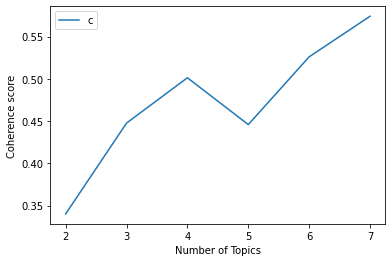

In [345]:
# plot the coherence scores
coherence_scores = [] # get coherence value
for i in range(2, 8): # get coherence value
    lsi_3 = models.LsiModel(corpus_tfidf_3, id2word=dictionary, num_topics=i) # get coherence value
    coherence_model_lsi_3 = CoherenceModel(model=lsi_3, texts=df['clean_text3'], dictionary=dictionary, coherence='c_v') # get coherence value
    coherence_lsi_3 = coherence_model_lsi_3.get_coherence() # get coherence value
    coherence_scores.append(coherence_lsi_3) # get coherence value
    print('Coherence Score: ', coherence_lsi_3) # get coherence value
    print('Number of Topics: ', i) # get coherence value
    print('---------------------') # get coherence value

# plot the coherence scores
plt.plot(range(2, 8), coherence_scores) # get coherence value
plt.xlabel("Number of Topics") # get coherence value
plt.ylabel("Coherence score") # get coherence value
plt.legend(("coherence_values"), loc='best') # get coherence value
plt.show() # get coherence value

In [346]:
# create the LDA model
lda_3 = models.LdaModel(corpus_tfidf_3, id2word=dictionary, num_topics=5) # initialize an LDA transformation
corpus_lda_3 = lda_3[corpus_tfidf_3] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lda

# print the topics
lda_3.print_topics(5) # both bow->tfidf and tfidf->lda transformations are actually executed here, on the fly

[(0,
  '0.008*"game" + 0.008*"players" + 0.007*"time" + 0.007*"year" + 0.005*"world" + 0.005*"england" + 0.005*"cup" + 0.005*"games" + 0.005*"t" + 0.005*"people"'),
 (1,
  '0.023*"mr" + 0.008*"blair" + 0.007*"year" + 0.006*"people" + 0.005*"uk" + 0.005*"party" + 0.005*"minister" + 0.005*"us" + 0.005*"labour" + 0.004*"time"'),
 (2,
  '0.015*"mr" + 0.007*"us" + 0.007*"people" + 0.006*"labour" + 0.005*"government" + 0.005*"party" + 0.005*"tax" + 0.005*"technology" + 0.004*"year" + 0.004*"%"'),
 (3,
  '0.020*"%" + 0.012*"year" + 0.008*"sales" + 0.007*"us" + 0.007*"music" + 0.006*"uk" + 0.006*"mr" + 0.006*"market" + 0.005*"growth" + 0.004*"time"'),
 (4,
  '0.013*"people" + 0.009*"%" + 0.008*"year" + 0.007*"mr" + 0.007*"us" + 0.006*"search" + 0.006*"film" + 0.005*"world" + 0.005*"information" + 0.005*"-"')]

In [347]:
# Add the LDA topics to the dataframe
df['lda_3'] = [x for x in corpus_lda_3] # get coherence value
df.head(10) # get coherence value

,category,text,clean_text1,tfidf_1,lsi_1,lda_1,clean_text2,tfidf_2,lsi_2,lda_2,clean_text3,tfidf_3,lsi_3,lda_3
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030...","[(0, 0.17393296863903654), (1, 0.0969406963315...","[(0, 0.015721537), (1, 0.015436691), (2, 0.015...","[plasma, tvs, radically, rooms, set-top, tivo,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.2543618483189095), (1, -0.030780742721...","[(1, 0.41074812), (2, 0.42925924), (4, 0.15145...","[tv, future, hands, viewers, home, theatre, sy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 8.68105728686178), (1, -4.427367042019529...","[(2, 0.7829059), (3, 0.10520569), (4, 0.110242..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, worldcom, boss, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09801563087594052), (1, -0.016498338994...","[(0, 0.027571207), (1, 0.024877395), (2, 0.024...","[bernie, overseeing, $11bn, witness, myers, co...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2767406767597...","[(0, -0.056683244630928165), (1, -0.0214153629...","[(1, 0.29187563), (2, 0.40473023), (3, 0.29167...","[worldcom, boss, books, worldcom, boss, bernie...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 6.889350741672094), (1, 6.102056416736811...","[(2, 0.9315966), (3, 0.062963895)]"
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, rus...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.09739712128326636), (1, 0.0618177669281...","[(0, 0.026160253), (1, 0.025955101), (2, 0.026...","[tigers, wary, gamble, rushed, tigers, wells, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.025722335490471596), (1, -0.0039278616...","[(0, 0.30218706), (1, 0.069430515), (2, 0.0147...","[tigers, farrell, gamble, leicester, bid, andy...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.9744897257042691), (1, -0.5408305871059...","[(0, 0.6588241), (2, 0.124428235), (4, 0.21092..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 0.05401860817832453), (1, 0.0514789601931...","[(0, 0.032375917), (1, 0.027758008), (2, 0.027...","[arguably, slough, exeter, trafford, holders, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1495351121519697), (1, -0.050517657173...","[(1, 0.14359447), (2, 0.23170993), (4, 0.61618...","[newcastle, fa, cup, premiership, side, newcas...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 1.3995834815575376), (1, -1.0999745970827...","[(0, 0.8086105), (1, 0.01804012), (4, 0.171442..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, raids, box, office, ocean, s, crime...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061...","[(0, 0.09150104938075172), (1, 0.0785072891263...","[(0, 0.020548142), (1, 0.021304019), (2, 0.214...","[twelve, raids, twelve, clooney, brad, pitt, j...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.14459686392078036), (1, -0.04196720557...","[(1, 0.725421), (2, 0.19846648), (3, 0.063881)]","[ocean, raids, box, office, ocean, crime, cape...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, 1.4443040943667742), (1, -1.1176407882138...","[(1, 0.3889295), (2, 0.605614)]"
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hits, mongrel, jibe, michael, howard,...","[0.0, 0.032974084459105844, 0.0, 0.0, 0.0, 0.0...","[(0, 0.27098976398487684), (1, -0.262393786978...","[(0, 0.017764043), (1, 0.017722338), (2, 0.017...","[mongrel, jibe, hain, mongrel, rattled, opposi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[(0, -0.1922281538377411), (1, -0.034602390774...","[(1, 0.89870477), (2, 0.087623805)]","[mongrel, jibe, michael, howard, claim, pete

In [348]:
# Let's create a coherence model for LDA
coherence_model_lda_3 = CoherenceModel(model=lda_3, texts=df['clean_text3'], dictionary=dictionary, coherence='c_v') # get coherence value
coherence_lda_3 = coherence_model_lda_3.get_coherence() # get coherence value
print('Coherence Score: ', coherence_lda_3) # get coherence value
print('Number of Topics: ', 5) # get coherence value
print('---------------------') # get coherence value

Coherence Score:  0.32817932506105246
Number of Topics:  5
---------------------


Coherence Score:  0.2548016963399561
Number of Topics:  2
---------------------
Coherence Score:  0.30277617862780604
Number of Topics:  3
---------------------
Coherence Score:  0.2875273636299299
Number of Topics:  4
---------------------
Coherence Score:  0.25472188652663447
Number of Topics:  5
---------------------
Coherence Score:  0.3789113376651148
Number of Topics:  6
---------------------
Coherence Score:  0.39375217991385014
Number of Topics:  7
---------------------


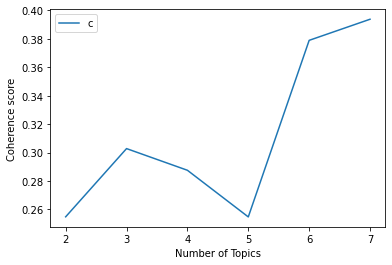

In [349]:
# plot the coherence scores
coherence_scores = [] # get coherence value
for i in range(2, 8): # get coherence value
    lda_3 = models.LdaModel(corpus_tfidf_3, id2word=dictionary, num_topics=i) # get coherence value
    coherence_model_lda_3 = CoherenceModel(model=lda_3, texts=df['clean_text3'], dictionary=dictionary, coherence='c_v') # get coherence value
    coherence_lda_3 = coherence_model_lda_3.get_coherence() # get coherence value
    coherence_scores.append(coherence_lda_3) # get coherence value
    print('Coherence Score: ', coherence_lda_3) # get coherence value
    print('Number of Topics: ', i) # get coherence value
    print('---------------------') # get coherence value

# plot the coherence scores
plt.plot(range(2, 8), coherence_scores) # get coherence value
plt.xlabel("Number of Topics") # get coherence value
plt.ylabel("Coherence score") # get coherence value
plt.legend(("coherence_values"), loc='best') # get coherence value
plt.show() # get coherence value